# Student Performance vs Funding

### Import Dependencies and Setup for the analyze

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import warnings

# https://data.gov.tw/en/datasets/124049
file_to_load = "汐止區.csv"

# Read the score data and the revenue results
csv_df = pd.read_csv(file_to_load)


## compare to the code using HTML and JavaScript 

In [64]:
csv_df.head(12)

,sname,district,pzoon,fzoon,mark
0,北峰國小,汐止區,中興里、福德里、康福里、興福里、環河里（6－10鄰）、樟樹里（6－8、10－11鄰）,樟樹里（9鄰）【北峰、樟樹國小自由學區】,NaN
1,北港國小,汐止區,拱北里、烘內里、八連里（5－10鄰）,八連里（1－4鄰）【北港、汐止國小自由學區】,NaN
2,白雲國小,汐止區,橫科里、福山里,一、白雲里（1－9鄰）【白雲、汐止、秀峰國小自由學區】 二、宜興里、東勢里【白雲國小、臺北市...,開放為全市自由學區。
3,汐止國小,汐止區,仁德里、義民里、禮門里、智慧里、大同里、信望里、江北里,一、復興里【汐止、秀峰國小自由學區】 二、白雲里（1－9鄰）【汐止、白雲、秀峰國小自由學區】...,NaN
4,秀峰國小,汐止區,秀峰里、秀山里、福安里,一、復興里【秀峰、汐止國小自由學區】 二、白雲里（1－9鄰）【秀峰、白雲、汐止國小自由學區】...,◎青山國中小國小部學區內學齡兒童（文化里、自強里），兄姐已就讀秀峰國小者，為方便家長接送可優...
5,東山國小,汐止區,東山里,NaN,開放為全市自由學區。
6,金龍國小,汐止區,北峰里、金龍里、湖光里、湖蓮里、湖興里、北山里、環河里（1－5鄰）,一、長青里【金龍國小、臺北市大湖國小自由學區】 二、忠山里【金龍國小、臺北市東湖國小自由學區】,NaN
7,長安國小,汐止區,鄉長里、長安里、保長里,建成里（19－23鄰）【長安、崇德國小自由學區】,NaN
8,青山國中小國小部,汐止區,文化里、自強里,白雲里（10－26鄰）【青山國中小國小部、秀峰國小自由學區】,紅色字體部份係因101年度進行鄰里調整，調整鄰數後，不影響原學區劃分。
9,保長國小,汐止區,保新里、保安里,NaN,NaN


In [65]:
# https://data.gov.tw/en/datasets/145164
file_to_load = "方言通過.csv"

# Read the score data and the revenue results
csv_df = pd.read_csv(file_to_load)

In [66]:
csv_df.head(5)

,Seq,DateListed,年度,族語方言別,級別,報名人數,應試人數,通過人數
0,1,20211006,109,南勢阿美語,初級,405,277,103
1,2,20211006,109,南勢阿美語,中級,396,309,161
2,3,20211006,109,南勢阿美語,中高級,91,55,6
3,4,20211006,109,南勢阿美語,高級,30,25,0
4,5,20211006,109,南勢阿美語,優級,12,10,0


In [67]:
df = csv_df.loc[(csv_df["族語方言別"] == "南勢阿美語") & (csv_df["級別"] == "初級"), ["報名人數","應試人數","通過人數"]]
df.values.tolist()[0]

[405, 277, 103]

               南勢阿美語 - 初級
 報名人數: 405,  應試人數: 277, 通過人數: 103


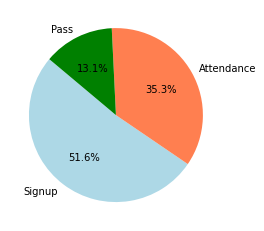

In [75]:
labels = ["Signup","Attendance","Pass"]
exams = df.values.tolist()[0]
colors = ["lightblue", "coral", "green"]

plt.pie(exams, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)

print(f"               南勢阿美語 - 初級")
print(f"============================================")
print(f" 報名人數: {exams[0]},  應試人數: {exams[1]}, 通過人數: {exams[2]}")
plt.show()

In [46]:
dialects = csv_df["族語方言別"].unique()
dialects

array(['南勢阿美語', '秀姑巒阿美語', '海岸阿美語', '馬蘭阿美語', '恆春阿美語', '賽考利克泰雅語', '四季泰雅語',
       '澤敖利泰雅語', '宜蘭澤敖利泰雅語', '汶水泰雅語', '萬大泰雅語', '東排灣語', '北排灣語', '中排灣語',
       '南排灣語', '卓群布農語', '卡群布農語', '丹群布農語', '巒群布農語', '郡群布農語', '知本卑南語',
       '南王卑南語', '西群卑南語', '建和卑南語', '霧臺魯凱語', '東魯凱語', '多納魯凱語', '萬山魯凱語',
       '茂林魯凱語', '大武魯凱語', '鄒語', '賽夏語', '雅美語', '邵語', '噶瑪蘭語', '太魯閣語',
       '撒奇萊雅語', '都達語', '德固達雅語', '德路固語', '拉阿魯哇語', '卡那卡那富語'], dtype=object)

In [47]:
levels = csv_df["級別"].unique()
levels

array(['初級', '中級', '中高級', '高級', '優級'], dtype=object)

             南勢阿美語 - 初級
 報名人數: 405,  應試人數: 277, 通過人數: 103


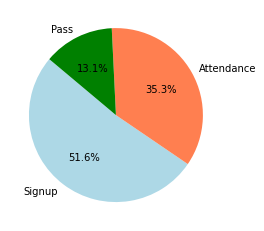

             南勢阿美語 - 中級
 報名人數: 396,  應試人數: 309, 通過人數: 161


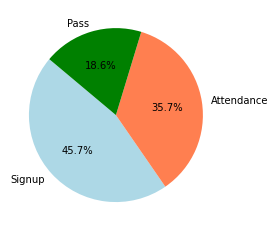

             南勢阿美語 - 中高級
 報名人數: 91,  應試人數: 55, 通過人數: 6


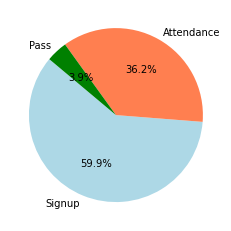

             南勢阿美語 - 高級
 報名人數: 30,  應試人數: 25, 通過人數: 0


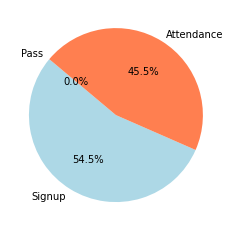

             南勢阿美語 - 優級
 報名人數: 12,  應試人數: 10, 通過人數: 0


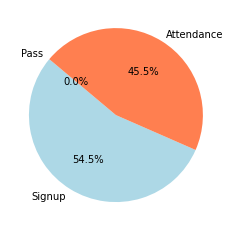

             秀姑巒阿美語 - 初級
 報名人數: 1145,  應試人數: 809, 通過人數: 254


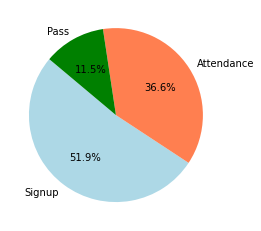

             秀姑巒阿美語 - 中級
 報名人數: 704,  應試人數: 536, 通過人數: 361


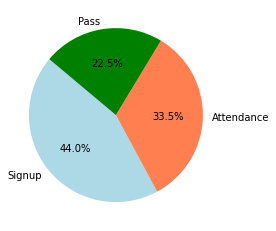

             秀姑巒阿美語 - 中高級
 報名人數: 310,  應試人數: 212, 通過人數: 34


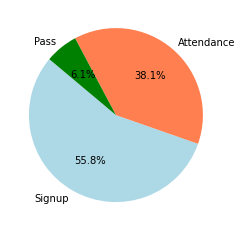

             秀姑巒阿美語 - 高級
 報名人數: 74,  應試人數: 50, 通過人數: 1


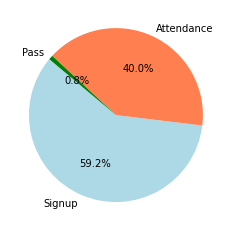

             秀姑巒阿美語 - 優級
 報名人數: 29,  應試人數: 19, 通過人數: 0


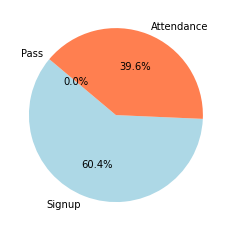

             海岸阿美語 - 初級
 報名人數: 2815,  應試人數: 2107, 通過人數: 597


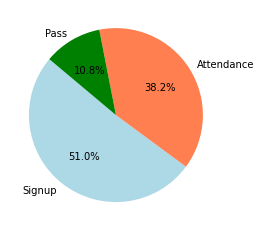

             海岸阿美語 - 中級
 報名人數: 1417,  應試人數: 1067, 通過人數: 579


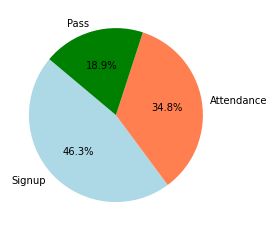

             海岸阿美語 - 中高級
 報名人數: 491,  應試人數: 351, 通過人數: 30


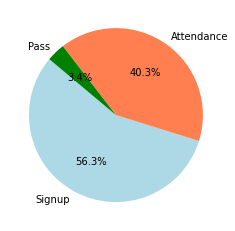

             海岸阿美語 - 高級
 報名人數: 85,  應試人數: 63, 通過人數: 0


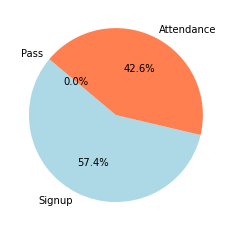

             海岸阿美語 - 優級
 報名人數: 48,  應試人數: 38, 通過人數: 0


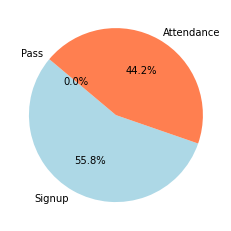

             馬蘭阿美語 - 初級
 報名人數: 751,  應試人數: 586, 通過人數: 201


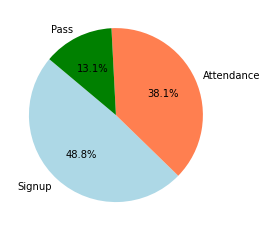

             馬蘭阿美語 - 中級
 報名人數: 431,  應試人數: 339, 通過人數: 236


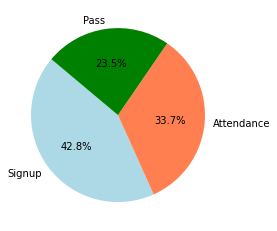

             馬蘭阿美語 - 中高級
 報名人數: 138,  應試人數: 99, 通過人數: 10


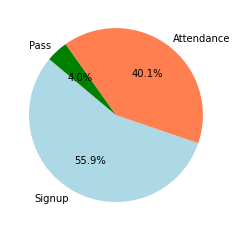

             馬蘭阿美語 - 高級
 報名人數: 36,  應試人數: 30, 通過人數: 2


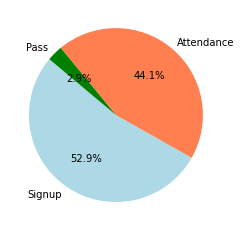

             馬蘭阿美語 - 優級
 報名人數: 13,  應試人數: 6, 通過人數: 0


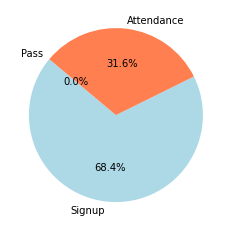

             恆春阿美語 - 初級
 報名人數: 106,  應試人數: 85, 通過人數: 36


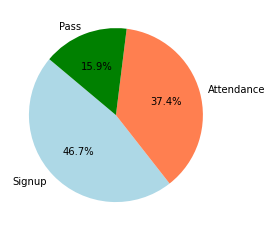

             恆春阿美語 - 中級
 報名人數: 63,  應試人數: 51, 通過人數: 37


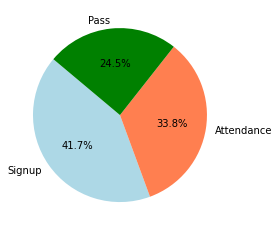

             恆春阿美語 - 中高級
 報名人數: 24,  應試人數: 22, 通過人數: 3


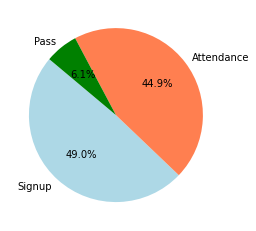

             恆春阿美語 - 高級
 報名人數: 4,  應試人數: 3, 通過人數: 0


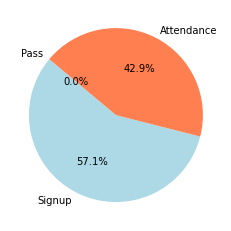

             恆春阿美語 - 優級
 報名人數: 10,  應試人數: 8, 通過人數: 0


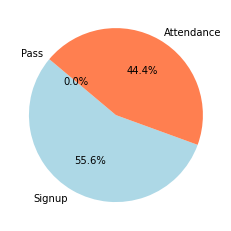

             賽考利克泰雅語 - 初級
 報名人數: 2351,  應試人數: 1755, 通過人數: 781


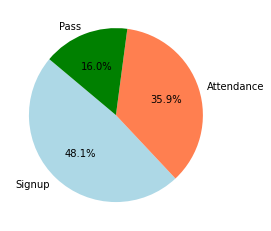

             賽考利克泰雅語 - 中級
 報名人數: 1342,  應試人數: 1047, 通過人數: 773


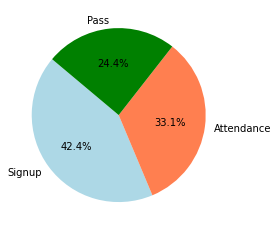

             賽考利克泰雅語 - 中高級
 報名人數: 417,  應試人數: 249, 通過人數: 20


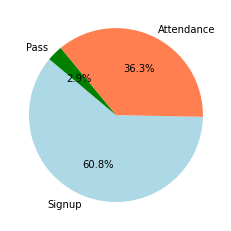

             賽考利克泰雅語 - 高級
 報名人數: 58,  應試人數: 35, 通過人數: 11


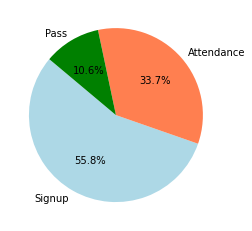

             賽考利克泰雅語 - 優級
 報名人數: 37,  應試人數: 27, 通過人數: 2


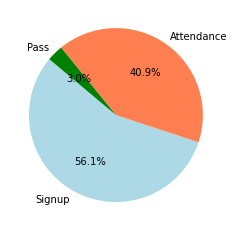

             四季泰雅語 - 初級
 報名人數: 55,  應試人數: 38, 通過人數: 15


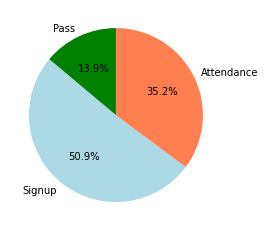

             四季泰雅語 - 中級
 報名人數: 62,  應試人數: 51, 通過人數: 30


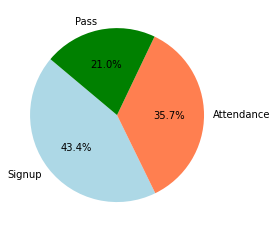

             四季泰雅語 - 中高級
 報名人數: 20,  應試人數: 14, 通過人數: 1


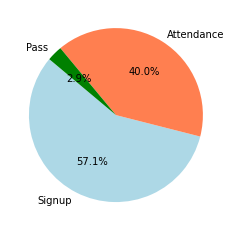

             四季泰雅語 - 高級
 報名人數: 2,  應試人數: 1, 通過人數: 0


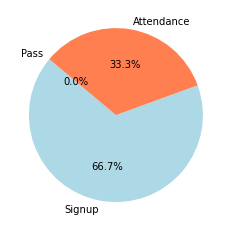

             四季泰雅語 - 優級
 報名人數: 0,  應試人數: 0, 通過人數: 0


<ipython-input-79-cc389a421702>:10: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(exams, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)


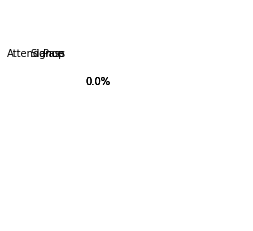

             澤敖利泰雅語 - 初級
 報名人數: 376,  應試人數: 275, 通過人數: 115


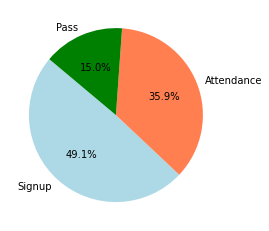

             澤敖利泰雅語 - 中級
 報名人數: 166,  應試人數: 136, 通過人數: 93


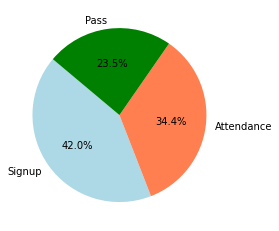

             澤敖利泰雅語 - 中高級
 報名人數: 115,  應試人數: 84, 通過人數: 12


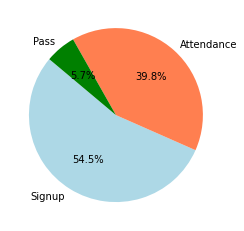

             澤敖利泰雅語 - 高級
 報名人數: 21,  應試人數: 15, 通過人數: 0


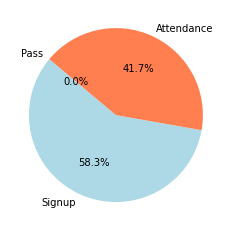

             澤敖利泰雅語 - 優級
 報名人數: 13,  應試人數: 12, 通過人數: 0


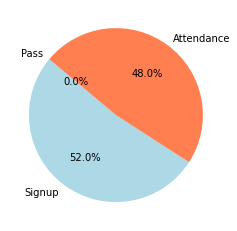

             宜蘭澤敖利泰雅語 - 初級
 報名人數: 158,  應試人數: 119, 通過人數: 64


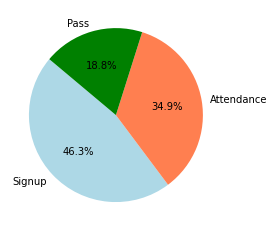

             宜蘭澤敖利泰雅語 - 中級
 報名人數: 125,  應試人數: 95, 通過人數: 69


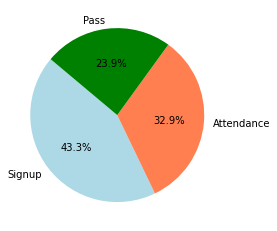

             宜蘭澤敖利泰雅語 - 中高級
 報名人數: 52,  應試人數: 31, 通過人數: 3


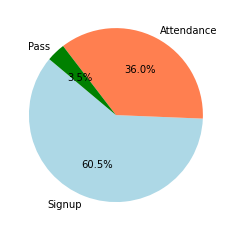

             宜蘭澤敖利泰雅語 - 高級
 報名人數: 6,  應試人數: 4, 通過人數: 0


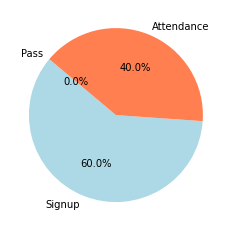

             宜蘭澤敖利泰雅語 - 優級
 報名人數: 1,  應試人數: 1, 通過人數: 0


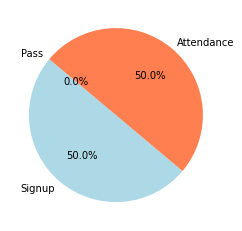

             汶水泰雅語 - 初級
 報名人數: 48,  應試人數: 31, 通過人數: 14


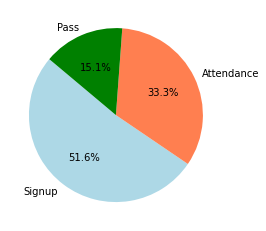

             汶水泰雅語 - 中級
 報名人數: 13,  應試人數: 9, 通過人數: 6


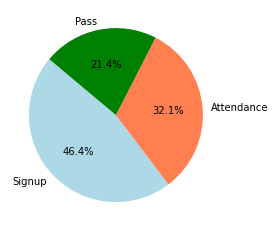

             汶水泰雅語 - 中高級
 報名人數: 4,  應試人數: 4, 通過人數: 0


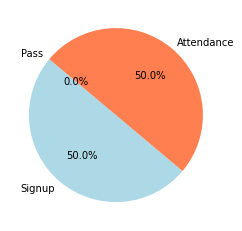

             汶水泰雅語 - 高級
 報名人數: 1,  應試人數: 0, 通過人數: 0


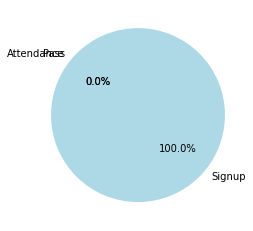

             汶水泰雅語 - 優級
 報名人數: 0,  應試人數: 0, 通過人數: 0


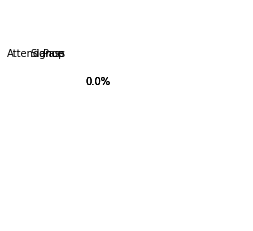

             萬大泰雅語 - 初級
 報名人數: 52,  應試人數: 40, 通過人數: 16


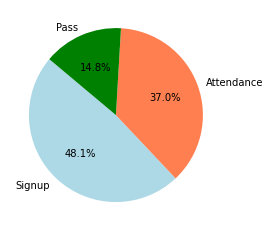

             萬大泰雅語 - 中級
 報名人數: 39,  應試人數: 32, 通過人數: 21


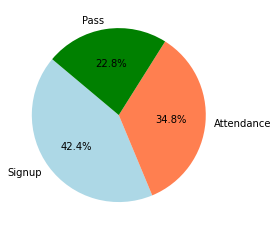

             萬大泰雅語 - 中高級
 報名人數: 17,  應試人數: 10, 通過人數: 1


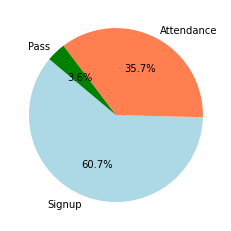

             萬大泰雅語 - 高級
 報名人數: 3,  應試人數: 3, 通過人數: 0


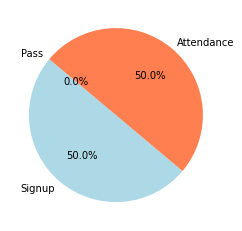

             萬大泰雅語 - 優級
 報名人數: 2,  應試人數: 2, 通過人數: 1


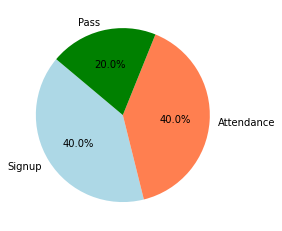

             東排灣語 - 初級
 報名人數: 865,  應試人數: 676, 通過人數: 284


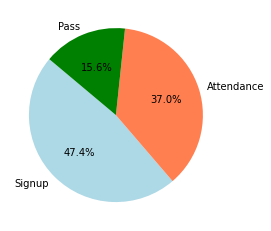

             東排灣語 - 中級
 報名人數: 520,  應試人數: 414, 通過人數: 271


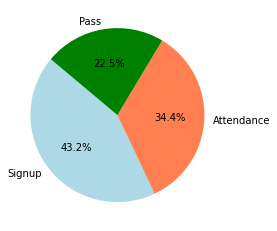

             東排灣語 - 中高級
 報名人數: 178,  應試人數: 122, 通過人數: 15


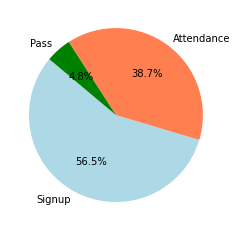

             東排灣語 - 高級
 報名人數: 35,  應試人數: 24, 通過人數: 0


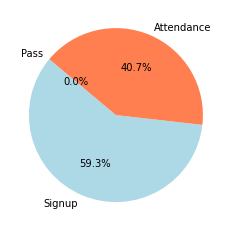

             東排灣語 - 優級
 報名人數: 24,  應試人數: 17, 通過人數: 0


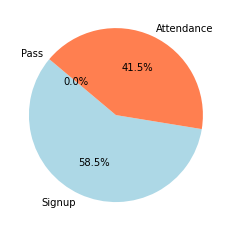

             北排灣語 - 初級
 報名人數: 897,  應試人數: 708, 通過人數: 298


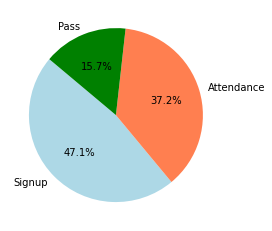

             北排灣語 - 中級
 報名人數: 587,  應試人數: 465, 通過人數: 342


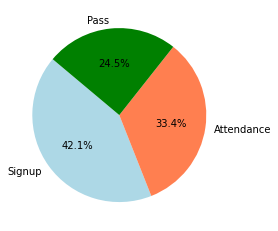

             北排灣語 - 中高級
 報名人數: 192,  應試人數: 137, 通過人數: 23


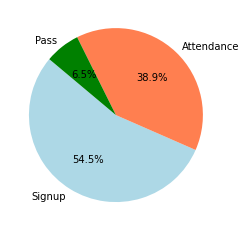

             北排灣語 - 高級
 報名人數: 34,  應試人數: 26, 通過人數: 0


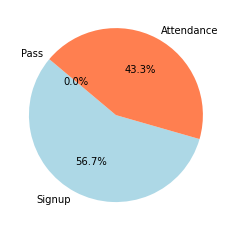

             北排灣語 - 優級
 報名人數: 19,  應試人數: 17, 通過人數: 0


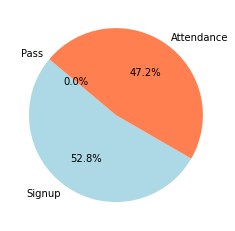

             中排灣語 - 初級
 報名人數: 508,  應試人數: 384, 通過人數: 162


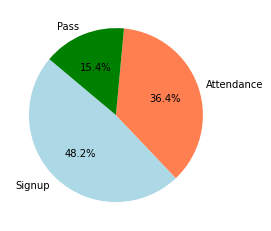

             中排灣語 - 中級
 報名人數: 385,  應試人數: 311, 通過人數: 206


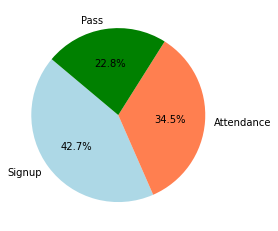

             中排灣語 - 中高級
 報名人數: 175,  應試人數: 125, 通過人數: 8


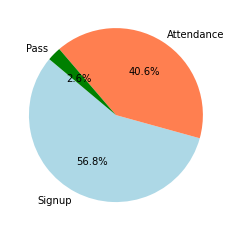

             中排灣語 - 高級
 報名人數: 26,  應試人數: 16, 通過人數: 0


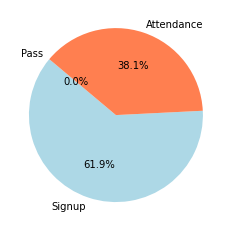

             中排灣語 - 優級
 報名人數: 7,  應試人數: 4, 通過人數: 0


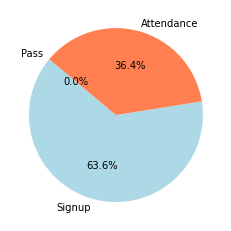

             南排灣語 - 初級
 報名人數: 922,  應試人數: 676, 通過人數: 304


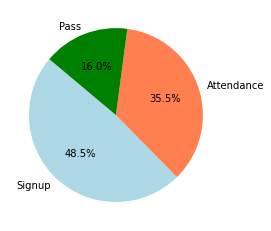

             南排灣語 - 中級
 報名人數: 523,  應試人數: 398, 通過人數: 289


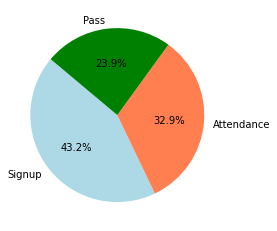

             南排灣語 - 中高級
 報名人數: 184,  應試人數: 125, 通過人數: 18


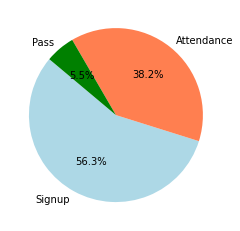

             南排灣語 - 高級
 報名人數: 35,  應試人數: 23, 通過人數: 1


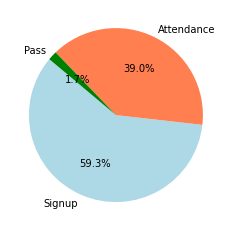

             南排灣語 - 優級
 報名人數: 22,  應試人數: 18, 通過人數: 1


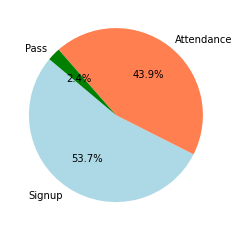

             卓群布農語 - 初級
 報名人數: 225,  應試人數: 163, 通過人數: 72


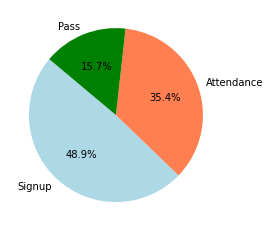

             卓群布農語 - 中級
 報名人數: 125,  應試人數: 100, 通過人數: 74


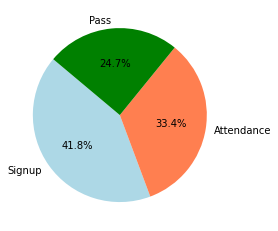

             卓群布農語 - 中高級
 報名人數: 41,  應試人數: 27, 通過人數: 5


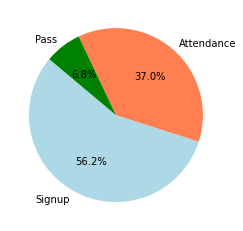

             卓群布農語 - 高級
 報名人數: 8,  應試人數: 7, 通過人數: 1


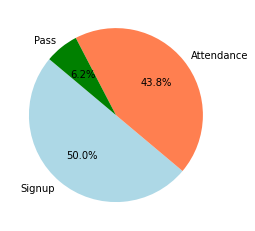

             卓群布農語 - 優級
 報名人數: 9,  應試人數: 8, 通過人數: 0


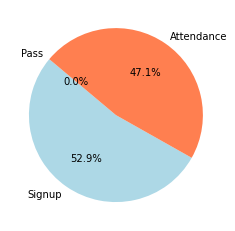

             卡群布農語 - 初級
 報名人數: 93,  應試人數: 79, 通過人數: 49


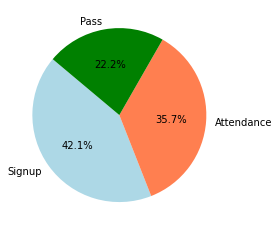

             卡群布農語 - 中級
 報名人數: 51,  應試人數: 42, 通過人數: 36


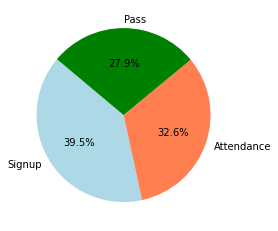

             卡群布農語 - 中高級
 報名人數: 22,  應試人數: 12, 通過人數: 5


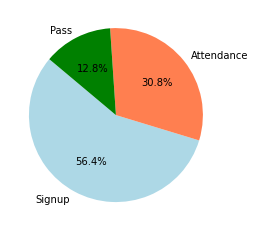

             卡群布農語 - 高級
 報名人數: 5,  應試人數: 1, 通過人數: 0


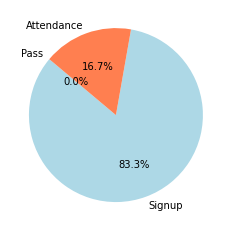

             卡群布農語 - 優級
 報名人數: 5,  應試人數: 5, 通過人數: 0


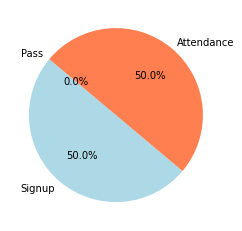

             丹群布農語 - 初級
 報名人數: 120,  應試人數: 89, 通過人數: 22


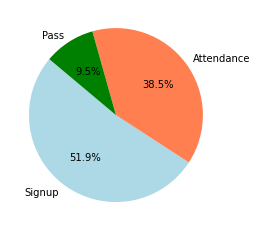

             丹群布農語 - 中級
 報名人數: 60,  應試人數: 49, 通過人數: 14


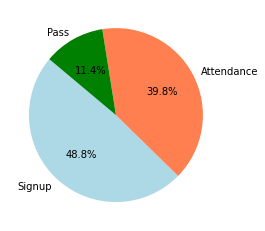

             丹群布農語 - 中高級
 報名人數: 26,  應試人數: 24, 通過人數: 0


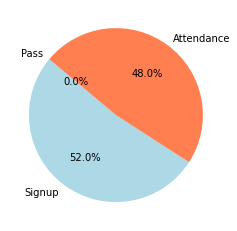

             丹群布農語 - 高級
 報名人數: 3,  應試人數: 1, 通過人數: 0


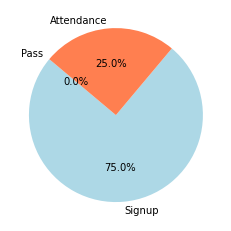

             丹群布農語 - 優級
 報名人數: 10,  應試人數: 9, 通過人數: 0


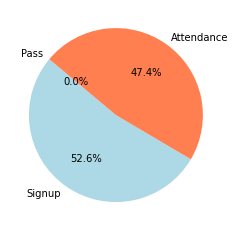

             巒群布農語 - 初級
 報名人數: 497,  應試人數: 371, 通過人數: 153


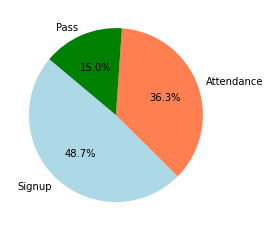

             巒群布農語 - 中級
 報名人數: 238,  應試人數: 183, 通過人數: 134


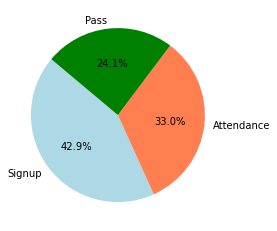

             巒群布農語 - 中高級
 報名人數: 77,  應試人數: 57, 通過人數: 5


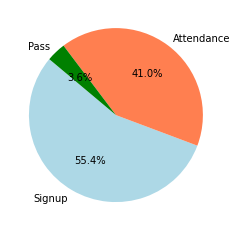

             巒群布農語 - 高級
 報名人數: 30,  應試人數: 23, 通過人數: 0


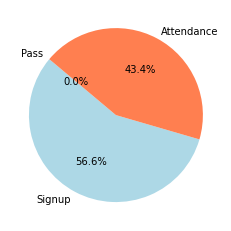

             巒群布農語 - 優級
 報名人數: 18,  應試人數: 13, 通過人數: 0


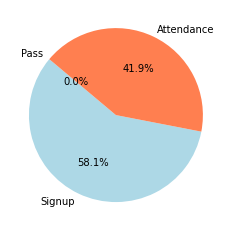

             郡群布農語 - 初級
 報名人數: 1276,  應試人數: 1002, 通過人數: 406


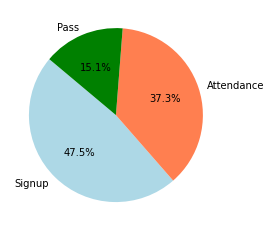

             郡群布農語 - 中級
 報名人數: 813,  應試人數: 650, 通過人數: 451


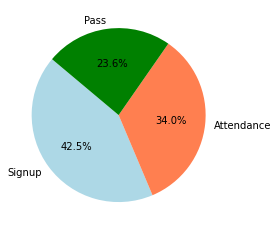

             郡群布農語 - 中高級
 報名人數: 274,  應試人數: 190, 通過人數: 13


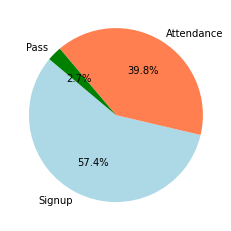

             郡群布農語 - 高級
 報名人數: 44,  應試人數: 28, 通過人數: 0


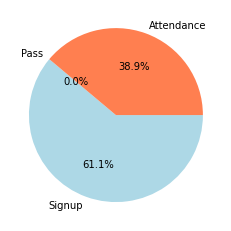

             郡群布農語 - 優級
 報名人數: 51,  應試人數: 34, 通過人數: 0


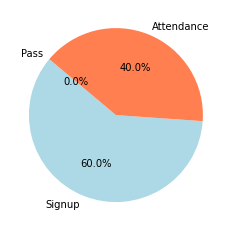

             知本卑南語 - 初級
 報名人數: 43,  應試人數: 30, 通過人數: 9


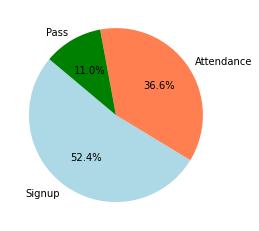

             知本卑南語 - 中級
 報名人數: 26,  應試人數: 17, 通過人數: 7


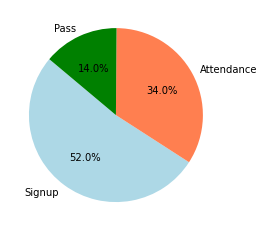

             知本卑南語 - 中高級
 報名人數: 7,  應試人數: 5, 通過人數: 0


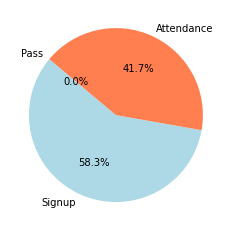

             知本卑南語 - 高級
 報名人數: 4,  應試人數: 2, 通過人數: 2


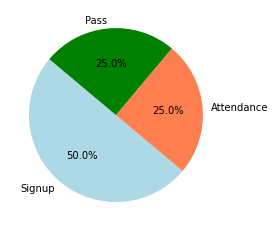

             知本卑南語 - 優級
 報名人數: 0,  應試人數: 0, 通過人數: 0


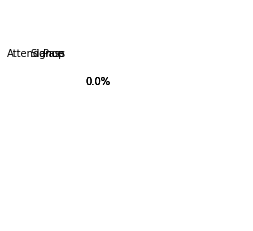

             南王卑南語 - 初級
 報名人數: 85,  應試人數: 71, 通過人數: 38


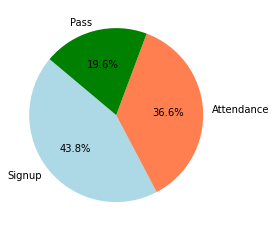

             南王卑南語 - 中級
 報名人數: 76,  應試人數: 61, 通過人數: 45


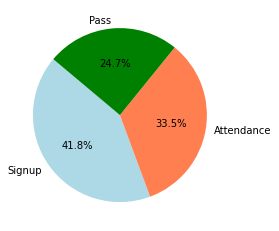

             南王卑南語 - 中高級
 報名人數: 38,  應試人數: 29, 通過人數: 3


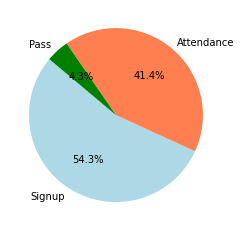

             南王卑南語 - 高級
 報名人數: 6,  應試人數: 4, 通過人數: 0


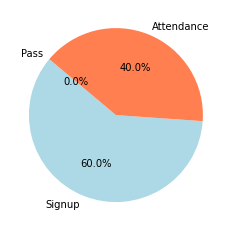

             南王卑南語 - 優級
 報名人數: 7,  應試人數: 6, 通過人數: 0


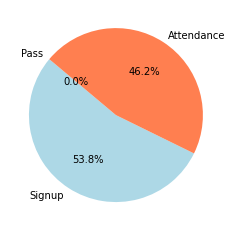

             西群卑南語 - 初級
 報名人數: 132,  應試人數: 99, 通過人數: 43


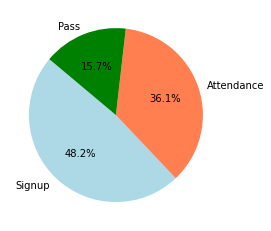

             西群卑南語 - 中級
 報名人數: 56,  應試人數: 44, 通過人數: 37


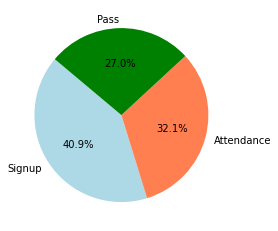

             西群卑南語 - 中高級
 報名人數: 25,  應試人數: 19, 通過人數: 1


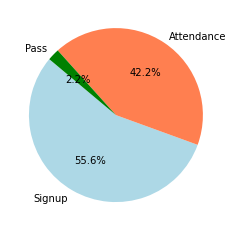

             西群卑南語 - 高級
 報名人數: 6,  應試人數: 5, 通過人數: 1


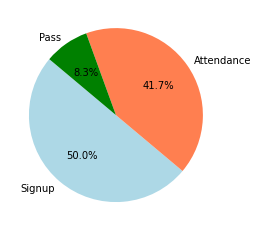

             西群卑南語 - 優級
 報名人數: 5,  應試人數: 5, 通過人數: 0


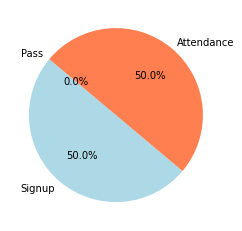

             建和卑南語 - 初級
 報名人數: 24,  應試人數: 15, 通過人數: 11


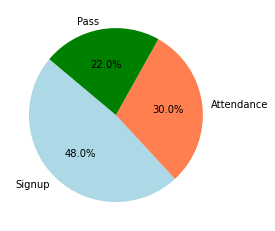

             建和卑南語 - 中級
 報名人數: 35,  應試人數: 25, 通過人數: 20


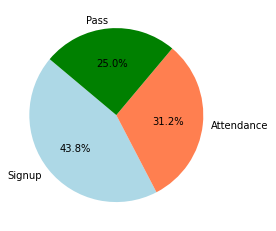

             建和卑南語 - 中高級
 報名人數: 13,  應試人數: 8, 通過人數: 4


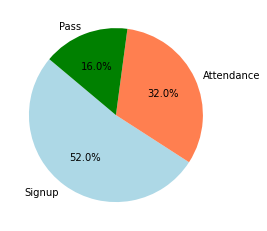

             建和卑南語 - 高級
 報名人數: 6,  應試人數: 5, 通過人數: 3


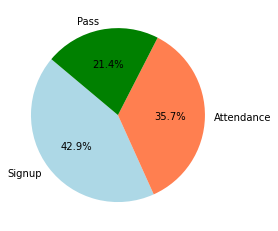

             建和卑南語 - 優級
 報名人數: 0,  應試人數: 0, 通過人數: 0


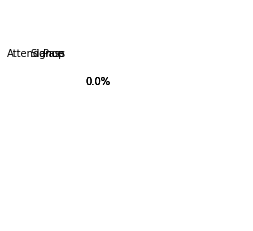

             霧臺魯凱語 - 初級
 報名人數: 196,  應試人數: 153, 通過人數: 86


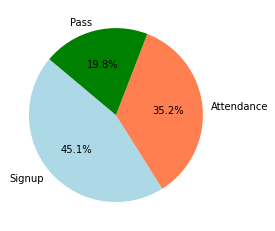

             霧臺魯凱語 - 中級
 報名人數: 159,  應試人數: 127, 通過人數: 85


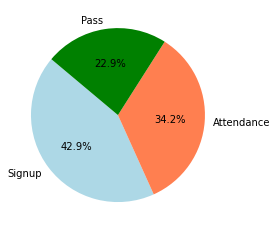

             霧臺魯凱語 - 中高級
 報名人數: 81,  應試人數: 55, 通過人數: 8


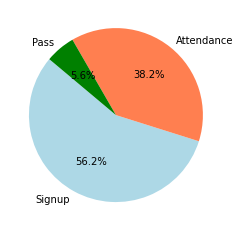

             霧臺魯凱語 - 高級
 報名人數: 12,  應試人數: 8, 通過人數: 0


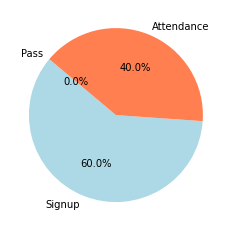

             霧臺魯凱語 - 優級
 報名人數: 11,  應試人數: 10, 通過人數: 1


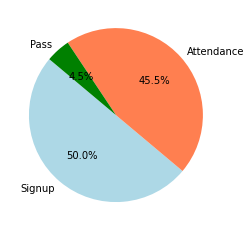

             東魯凱語 - 初級
 報名人數: 60,  應試人數: 49, 通過人數: 12


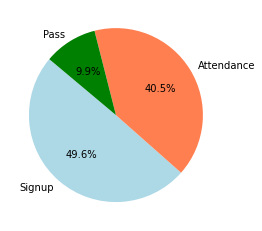

             東魯凱語 - 中級
 報名人數: 36,  應試人數: 26, 通過人數: 5


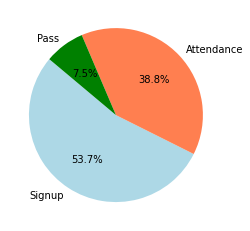

             東魯凱語 - 中高級
 報名人數: 20,  應試人數: 11, 通過人數: 1


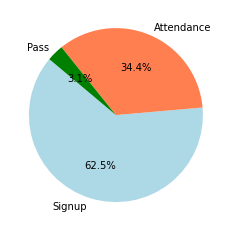

             東魯凱語 - 高級
 報名人數: 0,  應試人數: 0, 通過人數: 0


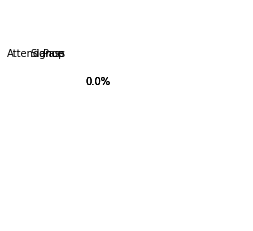

             東魯凱語 - 優級
 報名人數: 1,  應試人數: 1, 通過人數: 0


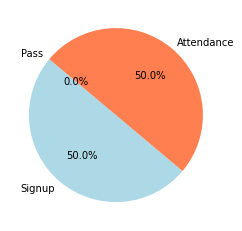

             多納魯凱語 - 初級
 報名人數: 22,  應試人數: 19, 通過人數: 6


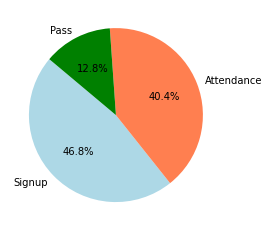

             多納魯凱語 - 中級
 報名人數: 32,  應試人數: 26, 通過人數: 24


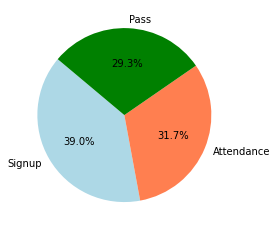

             多納魯凱語 - 中高級
 報名人數: 5,  應試人數: 4, 通過人數: 0


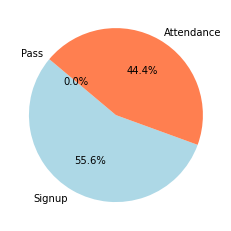

             多納魯凱語 - 高級
 報名人數: 6,  應試人數: 6, 通過人數: 2


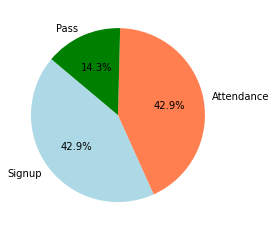

             多納魯凱語 - 優級
 報名人數: 1,  應試人數: 1, 通過人數: 0


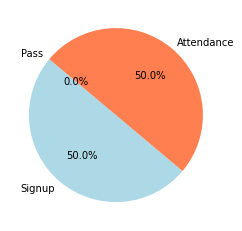

             萬山魯凱語 - 初級
 報名人數: 19,  應試人數: 16, 通過人數: 11


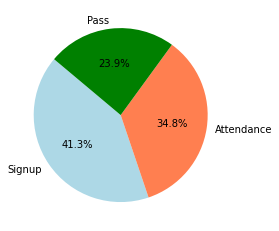

             萬山魯凱語 - 中級
 報名人數: 15,  應試人數: 12, 通過人數: 9


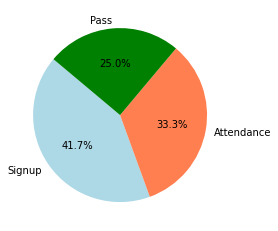

             萬山魯凱語 - 中高級
 報名人數: 13,  應試人數: 10, 通過人數: 2


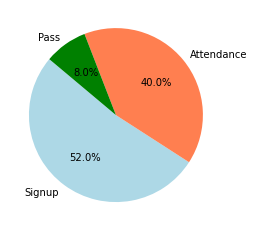

             萬山魯凱語 - 高級
 報名人數: 4,  應試人數: 3, 通過人數: 0


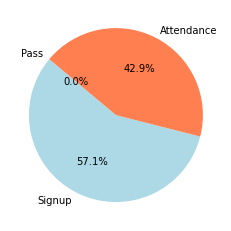

             萬山魯凱語 - 優級
 報名人數: 1,  應試人數: 1, 通過人數: 0


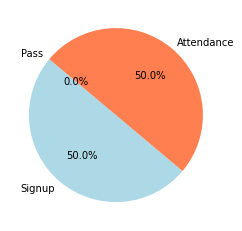

             茂林魯凱語 - 初級
 報名人數: 57,  應試人數: 46, 通過人數: 23


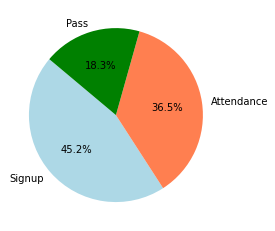

             茂林魯凱語 - 中級
 報名人數: 24,  應試人數: 19, 通過人數: 17


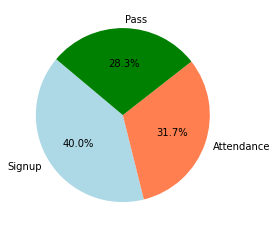

             茂林魯凱語 - 中高級
 報名人數: 12,  應試人數: 8, 通過人數: 2


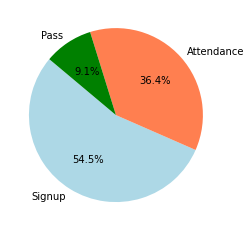

             茂林魯凱語 - 高級
 報名人數: 3,  應試人數: 1, 通過人數: 0


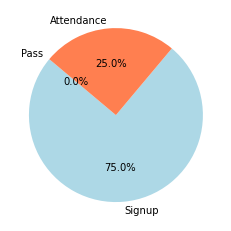

             茂林魯凱語 - 優級
 報名人數: 2,  應試人數: 0, 通過人數: 0


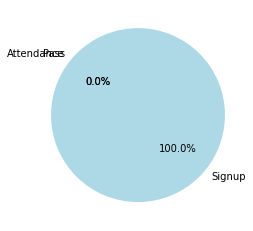

             大武魯凱語 - 初級
 報名人數: 16,  應試人數: 12, 通過人數: 7


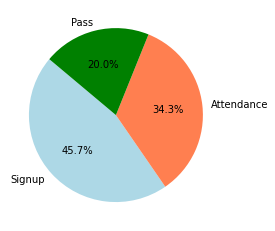

             大武魯凱語 - 中級
 報名人數: 11,  應試人數: 10, 通過人數: 7


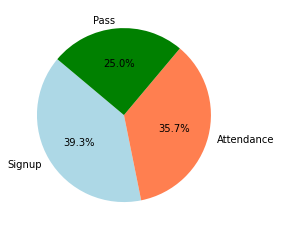

             大武魯凱語 - 中高級
 報名人數: 6,  應試人數: 3, 通過人數: 1


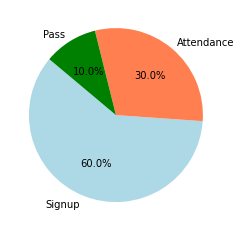

             大武魯凱語 - 高級
 報名人數: 0,  應試人數: 0, 通過人數: 0


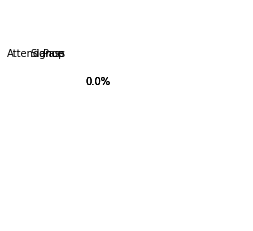

             大武魯凱語 - 優級
 報名人數: 2,  應試人數: 2, 通過人數: 0


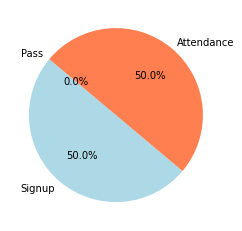

             鄒語 - 初級
 報名人數: 175,  應試人數: 140, 通過人數: 87


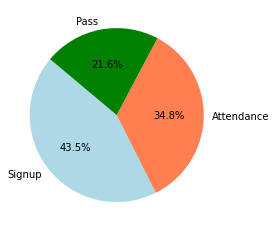

             鄒語 - 中級
 報名人數: 130,  應試人數: 111, 通過人數: 96


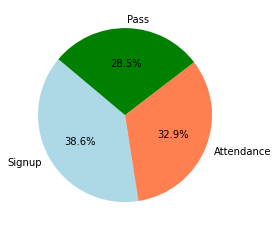

             鄒語 - 中高級
 報名人數: 65,  應試人數: 52, 通過人數: 5


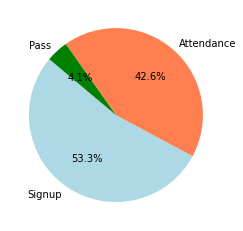

             鄒語 - 高級
 報名人數: 17,  應試人數: 11, 通過人數: 4


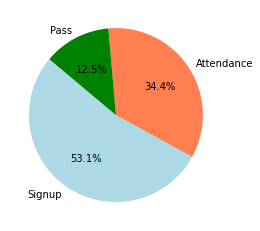

             鄒語 - 優級
 報名人數: 5,  應試人數: 5, 通過人數: 2


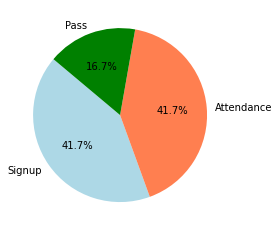

             賽夏語 - 初級
 報名人數: 165,  應試人數: 130, 通過人數: 49


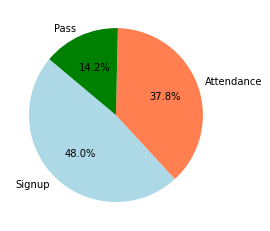

             賽夏語 - 中級
 報名人數: 98,  應試人數: 76, 通過人數: 50


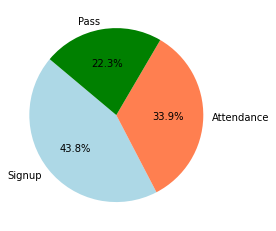

             賽夏語 - 中高級
 報名人數: 39,  應試人數: 32, 通過人數: 6


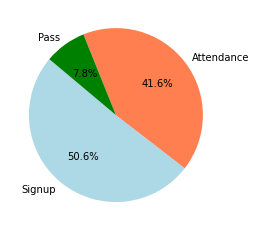

             賽夏語 - 高級
 報名人數: 17,  應試人數: 14, 通過人數: 3


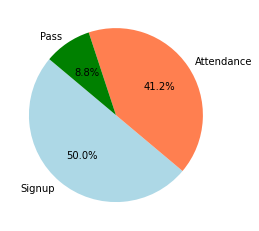

             賽夏語 - 優級
 報名人數: 4,  應試人數: 4, 通過人數: 0


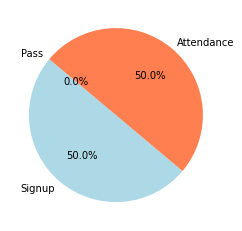

             雅美語 - 初級
 報名人數: 130,  應試人數: 112, 通過人數: 42


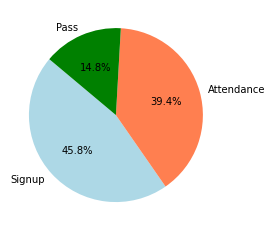

             雅美語 - 中級
 報名人數: 120,  應試人數: 90, 通過人數: 77


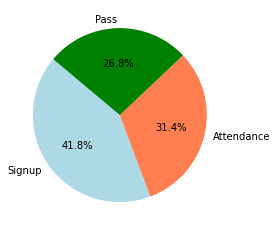

             雅美語 - 中高級
 報名人數: 39,  應試人數: 27, 通過人數: 7


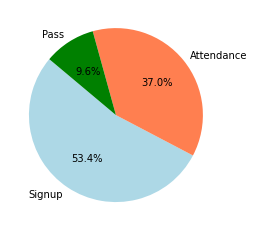

             雅美語 - 高級
 報名人數: 11,  應試人數: 4, 通過人數: 0


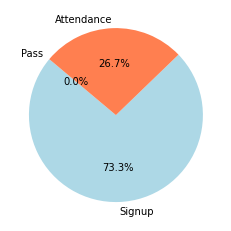

             雅美語 - 優級
 報名人數: 6,  應試人數: 4, 通過人數: 2


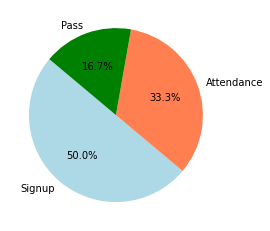

             邵語 - 初級
 報名人數: 39,  應試人數: 34, 通過人數: 16


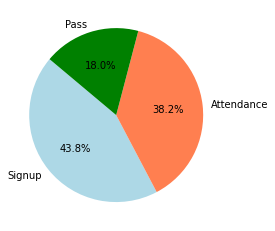

             邵語 - 中級
 報名人數: 7,  應試人數: 5, 通過人數: 3


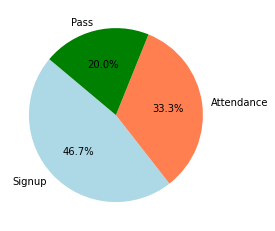

             邵語 - 中高級
 報名人數: 4,  應試人數: 1, 通過人數: 0


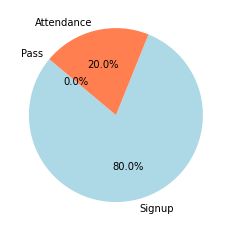

             邵語 - 高級
 報名人數: 3,  應試人數: 3, 通過人數: 2


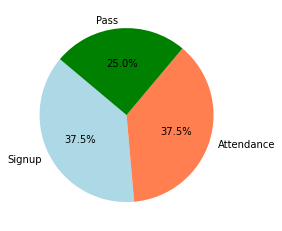

             邵語 - 優級
 報名人數: 0,  應試人數: 0, 通過人數: 0


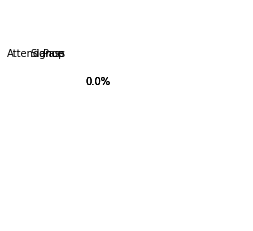

             噶瑪蘭語 - 初級
 報名人數: 45,  應試人數: 40, 通過人數: 14


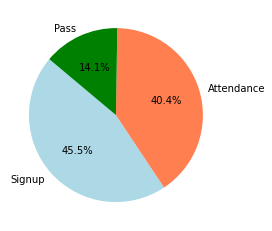

             噶瑪蘭語 - 中級
 報名人數: 19,  應試人數: 10, 通過人數: 3


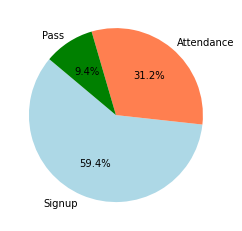

             噶瑪蘭語 - 中高級
 報名人數: 11,  應試人數: 7, 通過人數: 0


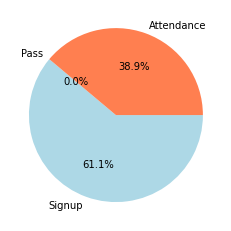

             噶瑪蘭語 - 高級
 報名人數: 7,  應試人數: 7, 通過人數: 1


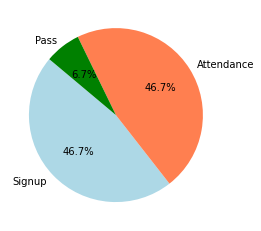

             噶瑪蘭語 - 優級
 報名人數: 5,  應試人數: 3, 通過人數: 0


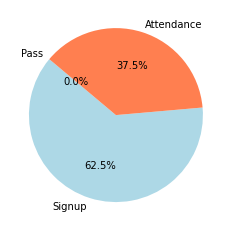

             太魯閣語 - 初級
 報名人數: 1006,  應試人數: 708, 通過人數: 243


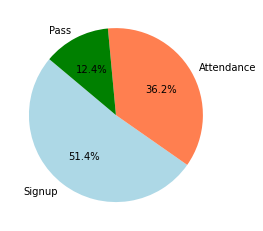

             太魯閣語 - 中級
 報名人數: 715,  應試人數: 537, 通過人數: 320


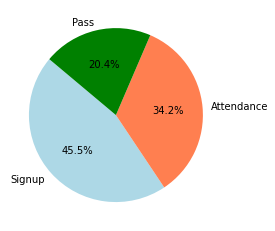

             太魯閣語 - 中高級
 報名人數: 155,  應試人數: 95, 通過人數: 10


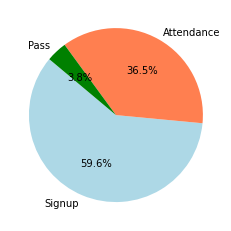

             太魯閣語 - 高級
 報名人數: 43,  應試人數: 30, 通過人數: 0


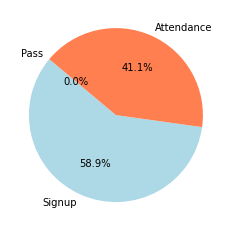

             太魯閣語 - 優級
 報名人數: 26,  應試人數: 19, 通過人數: 0


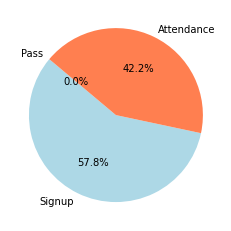

             撒奇萊雅語 - 初級
 報名人數: 28,  應試人數: 23, 通過人數: 14


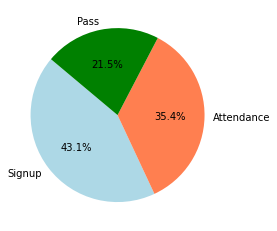

             撒奇萊雅語 - 中級
 報名人數: 28,  應試人數: 23, 通過人數: 16


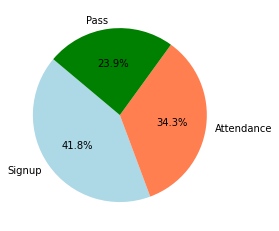

             撒奇萊雅語 - 中高級
 報名人數: 27,  應試人數: 21, 通過人數: 5


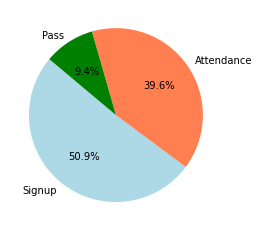

             撒奇萊雅語 - 高級
 報名人數: 13,  應試人數: 12, 通過人數: 2


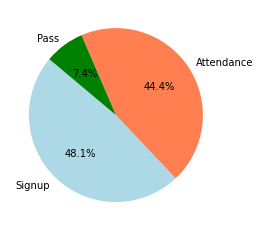

             撒奇萊雅語 - 優級
 報名人數: 5,  應試人數: 4, 通過人數: 1


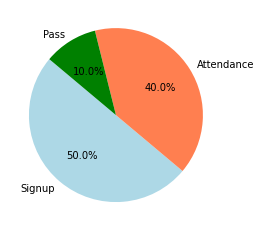

             都達語 - 初級
 報名人數: 150,  應試人數: 124, 通過人數: 61


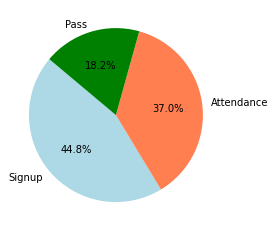

             都達語 - 中級
 報名人數: 113,  應試人數: 84, 通過人數: 64


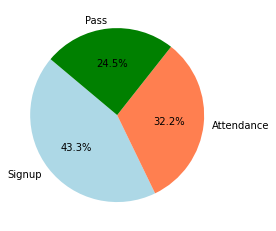

             都達語 - 中高級
 報名人數: 33,  應試人數: 21, 通過人數: 2


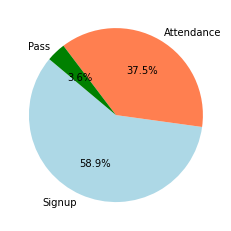

             都達語 - 高級
 報名人數: 3,  應試人數: 2, 通過人數: 0


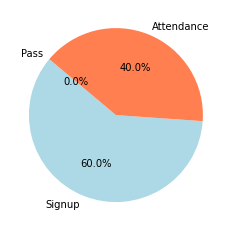

             都達語 - 優級
 報名人數: 4,  應試人數: 2, 通過人數: 0


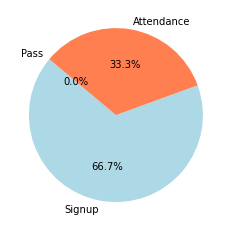

             德固達雅語 - 初級
 報名人數: 124,  應試人數: 98, 通過人數: 42


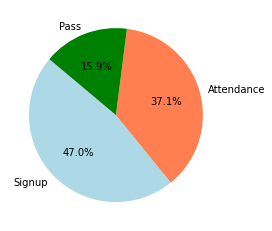

             德固達雅語 - 中級
 報名人數: 79,  應試人數: 68, 通過人數: 50


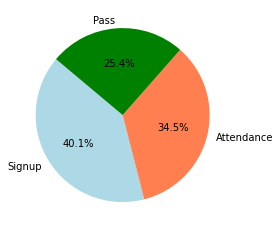

             德固達雅語 - 中高級
 報名人數: 32,  應試人數: 25, 通過人數: 7


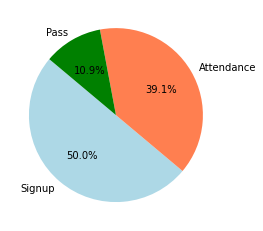

             德固達雅語 - 高級
 報名人數: 10,  應試人數: 7, 通過人數: 0


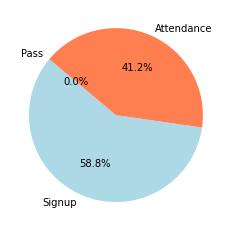

             德固達雅語 - 優級
 報名人數: 5,  應試人數: 5, 通過人數: 0


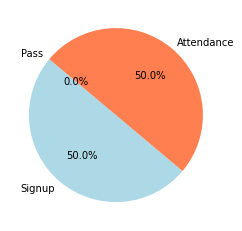

             德路固語 - 初級
 報名人數: 151,  應試人數: 117, 通過人數: 57


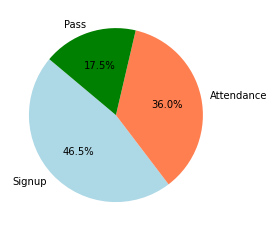

             德路固語 - 中級
 報名人數: 107,  應試人數: 88, 通過人數: 63


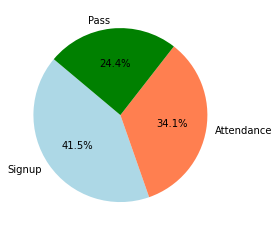

             德路固語 - 中高級
 報名人數: 30,  應試人數: 24, 通過人數: 2


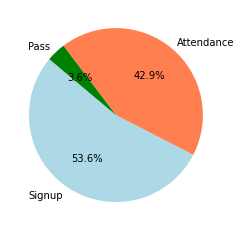

             德路固語 - 高級
 報名人數: 11,  應試人數: 8, 通過人數: 1


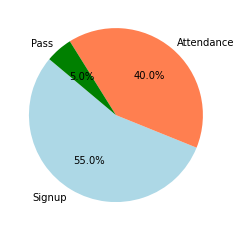

             德路固語 - 優級
 報名人數: 3,  應試人數: 3, 通過人數: 0


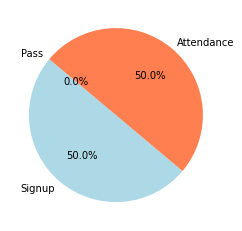

             拉阿魯哇語 - 初級
 報名人數: 28,  應試人數: 25, 通過人數: 17


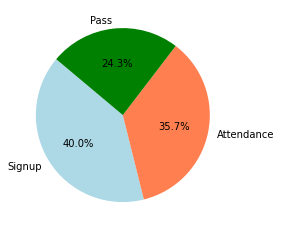

             拉阿魯哇語 - 中級
 報名人數: 15,  應試人數: 10, 通過人數: 9


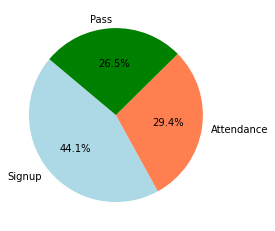

             拉阿魯哇語 - 中高級
 報名人數: 8,  應試人數: 8, 通過人數: 1


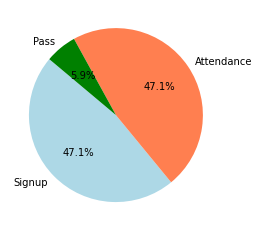

             拉阿魯哇語 - 高級
 報名人數: 1,  應試人數: 1, 通過人數: 0


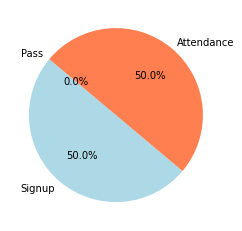

             拉阿魯哇語 - 優級
 報名人數: 1,  應試人數: 1, 通過人數: 1


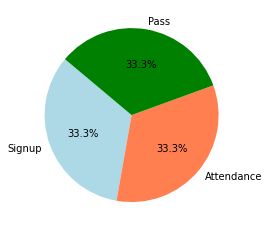

             卡那卡那富語 - 初級
 報名人數: 23,  應試人數: 19, 通過人數: 16


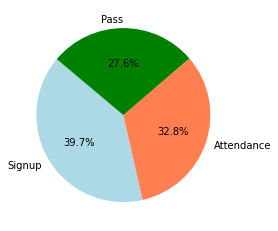

             卡那卡那富語 - 中級
 報名人數: 8,  應試人數: 8, 通過人數: 6


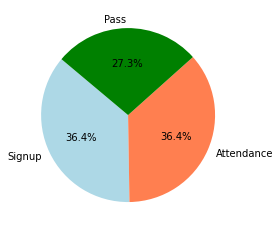

             卡那卡那富語 - 中高級
 報名人數: 6,  應試人數: 4, 通過人數: 1


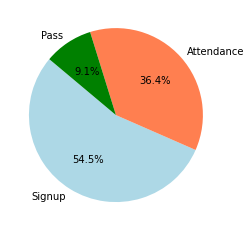

             卡那卡那富語 - 高級
 報名人數: 8,  應試人數: 5, 通過人數: 0


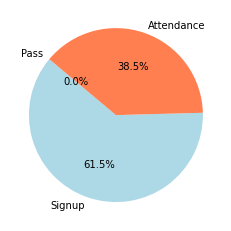

             卡那卡那富語 - 優級
 報名人數: 0,  應試人數: 0, 通過人數: 0


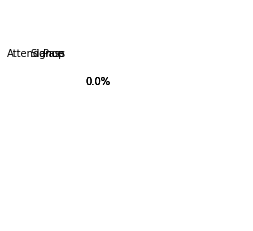

In [79]:
for dialet in dialects:
    for level in levels:
        df = csv_df.loc[(csv_df["族語方言別"] == dialet) & (csv_df["級別"] == level), ["報名人數","應試人數","通過人數"]]
#         print(df.values.tolist()[0])
        
        labels = ["Signup","Attendance","Pass"]
        exams = df.values.tolist()[0]
        colors = ["lightblue", "coral", "green"]

        plt.pie(exams, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)

        print(f"             {dialet} - {level}")
        print(f"========================================")
        print(f" 報名人數: {exams[0]},  應試人數: {exams[1]}, 通過人數: {exams[2]}")
        plt.show()